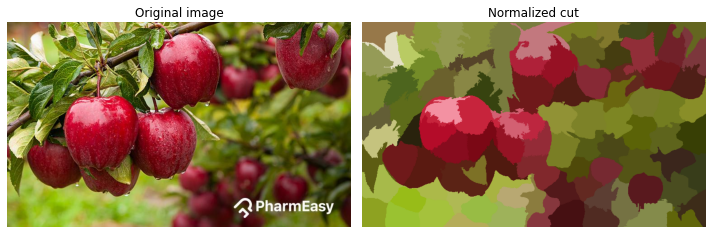

In [3]:
from skimage import io, color, segmentation, util
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

image_url = "https://blog-images-1.pharmeasy.in/blog/production/wp-content/uploads/2022/05/03114105/7-5.jpg"
Image.open(BytesIO(requests.get(image_url).content)).save('example.jpg')

# Load image
image = io.imread('example.jpg')

# Convert image to grayscale
#1
#gray_image = color.rgb2gray(image)
#2
gray_image = image

# Apply normalized cut (Ncut)
labels = segmentation.slic(gray_image, compactness=30, n_segments=100)
out1 = color.label2rgb(labels, gray_image, kind='avg')

# Display the result
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                        sharex=True, sharey=True)

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(out1)
ax[1].set_title('Normalized cut')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
